In [69]:
import pandas as pd 

df_filtered=pd.read_excel("data.xlsx")
df_filtered.head()

,Colonne1,Current positionapivia,Current URLapivia,Current positionlalala,Current URLlalala,Current positionlouloulou,Current URLlouloulou,Keyword,SERP features,Recherches mensuelles,count_pos,count_pos_inf_20,assurance,dentaire,mutuelle,santé,compa,Brand
0,0,1.0,https://www.apivia.fr/,NaN,NaN,NaN,NaN,apivia,"Sitelinks, People also ask, Local pack, Image ...",26000,1,1,0,0,0,0,0,1
1,1,1.0,https://www.apivia.fr/,NaN,NaN,NaN,NaN,apivia mutuelle,"Sitelinks, People also ask, Local pack, Image ...",8400,1,1,0,0,1,0,0,1
2,2,1.0,https://www.apivia.fr/,NaN,NaN,NaN,NaN,apivia niort,"Sitelinks, People also ask",1100,1,1,0,0,0,0,0,1
3,3,1.0,https://www.apivia.fr/,NaN,NaN,NaN,NaN,mutuelle apivia,"Sitelinks, People also ask, Image pack",900,1,1,0,0,1,0,0,1
4,4,1.0,https://www.apivia.fr/,NaN,NaN,NaN,NaN,apivia macif mutuelle,"Sitelinks, People also ask, Image pack",3100,1,1,0,0,1,0,0,1


In [70]:
phrases=df_filtered['Keyword']
phrases[:5]

0                   apivia
1          apivia mutuelle
2             apivia niort
3          mutuelle apivia
4    apivia macif mutuelle
Name: Keyword, dtype: object

In [71]:
from nltk.tokenize import word_tokenize
import nltk
from nltk import ngrams
from collections import Counter

nltk.download('punkt')

def generate_ngrams(sentences, n):
    ngrams_list = []
    for sentence in sentences:
        words = word_tokenize(sentence)
        sentence_ngrams = list(ngrams(words, n))
        ngrams_list.extend(sentence_ngrams)
    return ngrams_list

bigrams=generate_ngrams(phrases,2)

def count_ngrams(sentences, n):
    ngrams_list = []
    for sentence in sentences:
        # Tokenize the sentence into words
        words = word_tokenize(sentence)
        # Generate n-grams
        sentence_ngrams = list(ngrams(words, n))
        ngrams_list.extend(sentence_ngrams)
    # Count the occurrences of each n-gram
    ngrams_counts = Counter(ngrams_list)
    return ngrams_counts

# Count bigrams (n=2)
bigram_counts = count_ngrams(phrases, 2)
ngram=count_ngrams(phrases,1)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\YounèsAITKETTOUT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [72]:

from gensim.models import FastText
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

tokenized_phrases = [phrase.split() for phrase in phrases]

# Étape 2: Entraînement du Modèle FastText sur les Phrases Tokenisées
model = FastText(tokenized_phrases, vector_size=100, window=5, min_count=1, workers=5)

In [73]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Étape 3: Calcul des scores TF-IDF pour les phrases
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(phrases)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()

# Fonction pour représenter une phrase par une moyenne pondérée TF-IDF des vecteurs de mots
def phrase_to_vector(phrase, model, tfidf_vectorizer, tfidf_scores, phrase_index):
    words = phrase.split()
    word_vectors = []
    for word in words:
        if word in model.wv and word in tfidf_vectorizer.vocabulary_:
            tfidf_score = tfidf_scores[phrase_index, tfidf_vectorizer.vocabulary_[word]]
            word_vectors.append(model.wv[word] * tfidf_score)
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)

# Calculer les vecteurs des phrases avec TF-IDF pondéré
vectors = [phrase_to_vector(phrase, model, tfidf_vectorizer, tfidf_scores, i) for i, phrase in enumerate(phrases)]

# Convertir la liste de vecteurs en un tableau NumPy
vectors = np.array(vectors)


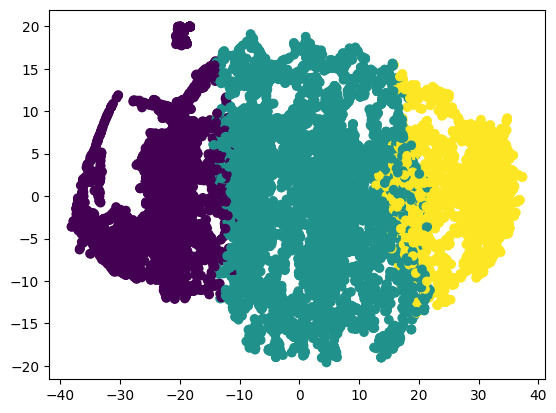

In [74]:

num_clusters = 3 
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(vectors)
clusters = kmeans.labels_

# Étape 4: Visualisation des Clusters
tsne = TSNE(n_components=3, random_state=0)
reduced_vectors = tsne.fit_transform(vectors)

plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=clusters)

In [75]:
# Étape 4: Clustering des Vecteurs
num_clusters = 10  # Fixer à 6 clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(vectors)
clusters = kmeans.labels_



In [77]:
clusters_dict = {i: [] for i in range(num_clusters)}
for i, phrase in enumerate(phrases):
    clusters_dict[clusters[i]].append(phrase)
"""""
for cluster, phrases in clusters_dict.items():
    print(f"Cluster {cluster + 1}:")
    for phrase in phrases:
        print(f" - {phrase}")
    #print("\n")
"""    

'""\nfor cluster, phrases in clusters_dict.items():\n    print(f"Cluster {cluster + 1}:")\n    for phrase in phrases:\n        print(f" - {phrase}")\n    #print("\n")\n'

In [79]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import SGD
from keras.initializers import VarianceScaling
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score



# Calcul des scores TF-IDF pour les phrases
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(phrases).toarray()

# Étape 2: Définition et Entraînement de l'Autoencoder
input_dim = tfidf_matrix.shape[1]
encoding_dim = 10  # Dimension de l'espace latent
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compilation de l'Autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(tfidf_matrix, tfidf_matrix, epochs=50, batch_size=2, shuffle=True, verbose=0)

encoder_model = Model(inputs=input_layer, outputs=encoder)
latent_representations = encoder_model.predict(tfidf_matrix)


num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(latent_representations)
clusters = kmeans.labels_


clusters_dict = {i: [] for i in range(num_clusters)}
"""""
for i, phrase in enumerate(phrases):
    clusters_dict[clusters[i]].append(phrase)

for cluster, phrases in clusters_dict.items():
    print(f"Cluster {cluster + 1}:")
    for phrase in phrases:
        print(f" - {phrase}")
    print("\n")
    """


5/5 [==============================] - 0s 2ms/step


'""\nfor i, phrase in enumerate(phrases):\n    clusters_dict[clusters[i]].append(phrase)\n\nfor cluster, phrases in clusters_dict.items():\n    print(f"Cluster {cluster + 1}:")\n    for phrase in phrases:\n        print(f" - {phrase}")\n    print("\n")\n    '

In [86]:
from sentence_transformers import SentenceTransformer
phrases=df_filtered['Keyword']
model = SentenceTransformer('all-MiniLM-L6-v2')

sentences=phrases

embeddings = model.encode(sentences)

num_clusters = 10

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(embeddings)

labels = kmeans.labels_
clusters = {i: [] for i in range(num_clusters)}

for sentence, label in zip(sentences, labels):
    clusters[label].append(sentence)

"""""
for cluster_id, cluster_sentences in clusters.items():
    print(f"\nCluster {cluster_id}:")
    for sentence in cluster_sentences:
        print(f"  - {sentence}")
"""        

c:\Users\YounèsAITKETTOUT\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


'""\nfor cluster_id, cluster_sentences in clusters.items():\n    print(f"\nCluster {cluster_id}:")\n    for sentence in cluster_sentences:\n        print(f"  - {sentence}")\n'

In [87]:
from nltk.corpus import stopwords

nltk.download('stopwords')

# Get French stopwords
french_stopwords = stopwords.words('french')
print('de' in french_stopwords)

True


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\YounèsAITKETTOUT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
#creating the name clusters 
clusters_names={}
for cluster_id, cluster_sentences in clusters.items():
    name=count_ngrams(cluster_sentences,1)
    sorted_items = sorted(name.items(), key=lambda x: x[1], reverse=True)
    for key, value in sorted_items:
        key = key[0]
        if(key not in french_stopwords):
            clusters_names[cluster_id]=key
            break 
for cluster_id, cluster_sentences in clusters.items():  
    print(f"\nCluster {clusters_names[cluster_id]}:")
    for sentence in cluster_sentences:
        print(f"  - {sentence}")


Cluster medecin:
  - yoga bienfaits
  - bienfaits yoga
  - hormone du bonheur
  - remboursement lunettes après opération cataracte
  - teleconsultation medecin
  - ordonnance perdue
  - légumineuses
  - bienfait vitamine c
  - ordonnance pilule perdue
  - activ'dos gratuit
  - benefice yoga
  - apivia prevention
  - perte ordonnance pilule
  - vitamine c bienfaits
  - respiration par minute
  - yoga bienfait
  - respiration moyenne par minute
  - combien respiration par minute
  - perte ordonnance
  - apovia
  - changement de lunettes après opération cataracte
  - podologue medecine douce
  - detox estomac
  - activ'dos
  - exercices activ'dos
  - symptômes du cancer du colon
  - duplicata ordonnance
  - respirations par minute
  - diabète et remboursement lunettes
  - hormone plaisir
  - prix consultation pneumologue
  - benefice du yoga
  - apivia vitamin
  - perdu ordonnance pilule
  - téléconsultation médicale
  - ocytocine aliment
  - activ dos ameli
  - hormone bonheur
  - magné